In [45]:
import numpy as np
import pandas as pd


df=pd.read_csv('/content/weatherAUS.csv')
print(df.shape)#145460-no of rows and 23 is the no of columns
df.head()#displays the first few rows of the dataframe

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [46]:
# df.count():

#     df.count() returns a Series with the count of non-null values for each column in the DataFrame df.
#     Each entry in this Series corresponds to the number of non-null values in the respective column.

# sort_values():

#     sort_values() sorts the Series (result of df.count()) in ascending order by default.
#     This means that the columns with the fewest non-null values will appear first, and the columns with the most non-null values will appear last.

In [26]:
df.count().sort_values() #-basically gives you the non-null values in each column in asceding order

,0
Sunshine,75625
Evaporation,82670
Cloud3pm,86102
Cloud9am,89572
Pressure9am,130395
Pressure3pm,130432
WindDir9am,134894
WindGustDir,135134
WindGustSpeed,135197
Humidity3pm,140953


In [27]:
#we could remove columns like
# Sunshine 	75625
# Evaporation 	82670
# Cloud3pm 	86102
# Cloud9am 	89572
# as they have very less data as
# Sunshine: Missing Values = 145,460 - 75,625 = 69,835
# Evaporation: Missing Values = 145,460 - 82,670 = 62,790
# Cloud3pm: Missing Values = 145,460 - 86,102 = 59,358
# Cloud9am: Missing Values = 145,460 - 89,572 = 55,888
# we are going to find if it will rain in Australia(not location specific)
# We are going to drop the date column too.

In [28]:
# axis=1 means remove/drop columns
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df.shape

(145460, 17)

In [29]:
df=df.dropna(how='any')#The how parameter specifies the condition for dropping rows or columns.
#'any' means that if any value in the row (or column, if axis=1) is missing, the entire row (or column) will be dropped.
df.shape

(112925, 17)

In [30]:
#next we need to remove the outliers-when some values are beyong the central tendency of that column
# the Z-score measures how many standard deviations a particular data point is from the mean of the dataset. The formula for calculating the Z-score of a value is:
# Z=(X−μ)σ
# Z=σ(X−μ)​
# # z = np.abs(stats.zscore(df._get_numeric_data())):
# This calculates the Z-score for each numeric value in the dataset and takes the absolute value to focus on distance, regardless of whether the value is above or below the mean.
# df = df[(z < 3).all(axis=1)]:
# axis=1 applies the operation across rows (horizontally).
# .all(axis=1) checks if all the values in each row (for every column) are True. If they are, it returns True for that row; otherwise, it returns False.
# This filters out any rows where the Z-score is greater than 3 for any feature, effectively removing rows that contain outliers in any of their numeric columns.

In [31]:
!pip install stats
from scipy import stats
z=np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.117567  0.108221  0.206661       0.241214      0.577742   
1       0.841802  0.206845  0.276405       0.241214      1.339742   
2       0.037620  0.292772  0.276405       0.391345      0.457900   
3       0.553991  0.622159  0.276405       1.260094      0.500842   
4       0.773137  1.237969  0.160165       0.016018      0.980214   
...          ...       ...       ...            ...           ...   
145454  1.465392  0.265754  0.276405       0.734636      0.021471   
145455  1.577319  0.036615  0.276405       0.734636      0.261157   
145456  1.449403  0.235487  0.276405       1.410225      0.261157   
145457  1.161592  0.464626  0.276405       0.284243      0.740528   
145458  0.777844  0.478947  0.276405       0.959832      0.261157   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.524408     0.190140     1.380413     1.382962     1.142455   
1           0.29131

(107868, 17)

In [32]:
#Lets deal with the categorical cloumns now
# simply change yes/no to 1/0 for RainToday and RainTomorrow
df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [33]:
#perform one-hot encoding
# https://youtu.be/agvfUvUNI4A?si=uKcyWe-xaqK-9RDX

#ml model learns if all the rows and columns have numeric values
#so one hot encoding is a way to transform the categorical values into numeric values
#here WindGustDir,WindDir9am 	WindDir3pm have categorical values so we transform them

In [34]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))

df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]


['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [35]:
cols_to_convert = [
    'WindDir9am_NNW',
    'WindDir9am_NW',
    'WindDir9am_S',
    'WindDir9am_SE',
    'WindDir9am_SSE',
    'WindDir9am_SSW',
    'WindDir9am_SW',
    'WindDir9am_W',
    'WindDir9am_WNW',
    'WindDir9am_WSW'
]
df[cols_to_convert] = df[cols_to_convert].astype(int)

In [36]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0


In [37]:
pd.set_option('display.max_columns', None)
cols_to_convert = [
    'WindGustDir_E',
    'WindGustDir_ENE',
    'WindGustDir_ESE',
    'WindGustDir_N',
    'WindGustDir_NE',
    'WindGustDir_NNE',
    'WindGustDir_NNW',
    'WindGustDir_NW',
    'WindGustDir_S',
    'WindGustDir_SE',
    'WindGustDir_SSE',
    'WindGustDir_SSW',
    'WindGustDir_SW',
    'WindGustDir_W',
    'WindGustDir_WNW',
    'WindGustDir_WSW',
    'WindDir3pm_E',
    'WindDir3pm_ENE',
    'WindDir3pm_ESE',
    'WindDir3pm_N',
    'WindDir3pm_NE',
    'WindDir3pm_NNE',
    'WindDir3pm_NNW',
    'WindDir3pm_NW',
    'WindDir3pm_S',
    'WindDir3pm_SE',
    'WindDir3pm_SSE',
    'WindDir3pm_SSW',
    'WindDir3pm_SW',
    'WindDir3pm_W',
    'WindDir3pm_WNW',
    'WindDir3pm_WSW',
    'WindDir9am_E',
    'WindDir9am_ENE',
    'WindDir9am_ESE',
    'WindDir9am_N',
    'WindDir9am_NE',
    'WindDir9am_NNE'
]
df[cols_to_convert] = df[cols_to_convert].astype(int)
print(df)

        MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145454      3.5     21.8       0.0           31.0          15.0          13.0   
145455      2.8     23.4       0.0           31.0          13.0          11.0   
145456      3.6     25.3       0.0           22.0          13.0           9.0   
145457      5.4     26.9       0.0           37.0           9.0           9.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidi

In [38]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,0.577128,0.652284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,0.510638,0.543147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,0.462766,0.565990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,0.515957,0.685279,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,0.563830,0.634518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#now that we are done with the pre-processing part, let's see which are the important features for RainTomorrow!
#Using SelectKBest-feature selection method to get the top features!
#using chi2 method we are going to select the top features that are most dependent on the target variable that is 'RainTomorrow' so that we can train only with those features
#k is the no of features
# transform: Creates a new dataset with only the top 3 features.
# fit: Trains the selector to compute feature importance.

from sklearn.feature_selection import SelectKBest, chi2,f_classif

X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(f_classif, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [40]:
df=df[['Rainfall', 'Humidity3pm', 'RainToday','RainTomorrow']]
df.head()

X=df[['Rainfall','Humidity3pm','RainToday']]
y=df[['RainTomorrow']]

In [41]:
# summarise

# Preprocessing steps
# 1.Remove the columns that have less data
# 2.Remove rows(columns) having missing values
# 3.Convert No/Yes to 0/1
# 4.Perform one hot encoding to convert categorical values to numerical values
# 5.Select best features

In [42]:
#Next model
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df.sample(5)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [43]:
# Setting the random_state parameter ensures that your results are reproducible.
#  If you set random_state to a fixed value (e.g., random_state=0), you’ll get the same results every time you run your code, assuming all other parameters and data remain the same.
#  This is useful for debugging and comparing results consistently.
from sklearn.metrics import accuracy_score

LogReg=LogisticRegression(solver='lbfgs',random_state=0)
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8405458523380428


In [44]:
import pandas as pd

# New sample data with more entries
new_data = pd.DataFrame({
    'Rainfall': [0.012, 0.045, 0.003, 0.000, 0.008, 0.025, 0.010, 0.050, 0.020, 0.005],
    'Humidity3pm': [0.18, 0.30, 0.22, 0.15, 0.10, 0.26, 0.20, 0.25, 0.29, 0.14],
    'RainToday': [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
})

# Make predictions
y_pred_new = LogReg.predict(new_data)

# Display predictions
print("Predictions for the new data:")
print(y_pred_new)

y_prob_new = LogReg.predict_proba(new_data)
print("Predicted probabilities for the new data:")
print(y_prob_new)


Predictions for the new data:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted probabilities for the new data:
[[0.97010987 0.02989013]
 [0.95999436 0.04000564]
 [0.96237378 0.03762622]
 [0.98456055 0.01543945]
 [0.98852982 0.01147018]
 [0.95121795 0.04878205]
 [0.96636969 0.03363031]
 [0.9701803  0.0298197 ]
 [0.94212626 0.05787374]
 [0.98539782 0.01460218]]


In [47]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy : 0.8409166759372566


In [48]:
print("Training features:")
print(X_train.columns)


Training features:
Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/kerala.csv')

# Ensure reproducibility
import numpy as np
np.random.seed(42)

# Randomly select 3 rows to remove
test_df = df.sample(n=3, random_state=42)

# Remove the selected rows from the original dataset
train_df = df.drop(test_df.index)

# Drop the FLOODS column from the test dataset
test_df = test_df.drop(columns=['FLOODS'])

# Save the test data and train data to separate files if needed
test_df.to_csv('test_data.csv', index=False)
train_df.to_csv('train_data.csv', index=False)

# Print the test data to verify
print(test_df)


   SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG  \
56      KERALA  1957   1.2  16.0  25.7   70.2  381.2  872.0  835.3  358.8   
89      KERALA  1990  14.9   4.8  18.0   41.8  488.5  528.6  635.4  370.8   
4       KERALA  1905   1.2  22.3   9.4  105.9  263.3  850.2  520.5  293.6   

      SEP    OCT    NOV   DEC  ANNUALRAINFALL  
56   41.3  280.1  192.5  28.9          3103.3  
89  103.3  323.2  158.8   5.2          2693.1  
4   217.2  383.5   74.4   0.2          2741.6  


In [50]:
df=pd.read_csv('/content/train_data.csv')
df=df.drop(columns=['SUBDIVISION'])
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,NO


In [51]:
df['FLOODS'].replace({'NO':0,'YES':1},inplace=True)
df.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,0


In [52]:
import numpy as np
from scipy import stats

z=np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df[(z<3).all(axis=1)]

         YEAR       JAN       FEB       MAR       APR       MAY       JUN  \
0    1.726998  1.049946  1.758970  0.478833  1.096686  0.342713  0.947044   
1    1.697592  0.366026  0.791663  0.667915  0.617517  0.617938  1.392573   
2    1.668187  0.591294  0.177699  1.130018  0.624274  0.170767  0.487907   
3    1.638781  0.728134  0.767429  0.164707  0.896835  0.074917  2.422993   
4    1.579970  0.921221  0.500855  0.904447  1.169395  0.437878  1.263103   
..        ...       ...       ...       ...       ...       ...       ...   
110  1.595824  0.501187  0.325158  0.639069  0.351714  0.179667  1.050019   
111  1.625229  0.597731  0.597791  0.429075  2.315325  0.157175  0.460934   
112  1.654635  0.642784  0.718961  0.041970  0.713750  0.262610  0.684268   
113  1.684040  0.674965  0.537206  0.937619  1.525301  0.350929  0.812119   
114  1.713446  1.075691  2.207300  0.379317  0.114567  0.280411  0.127551   

          JUL       AUG       SEP       OCT       NOV       DEC  \
0    0.1

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2013,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0,3255.4,1
110,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
111,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
112,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0


In [53]:
from sklearn.preprocessing import MinMaxScaler
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC','ANNUALRAINFALL']
scaler=MinMaxScaler()
df[monthly_columns]=scaler.fit_transform(df[monthly_columns])
print(df)



     YEAR       JAN       FEB       MAR       APR       MAY       JUN  \
0    1901  0.343713  0.565823  0.237218  0.653179  0.176977  0.696472   
1    1902  0.080240  0.032911  0.263473  0.314807  0.118325  0.215332   
2    1903  0.038323  0.235443  0.013819  0.313473  0.286402  0.401376   
3    1904  0.283832  0.037975  0.147858  0.259671  0.265976  1.000000   
4    1906  0.319760  0.093671  0.045140  0.205869  0.156697  0.241957   
..    ...       ...       ...       ...       ...       ...       ...   
110  2014  0.055090  0.130380  0.081990  0.367274  0.288299  0.285778   
111  2015  0.037126  0.073418  0.230309  0.893731  0.216516  0.406923   
112  2016  0.028743  0.048101  0.164901  0.577590  0.194047  0.360994   
113  2017  0.022754  0.086076  0.040534  0.135616  0.175226  0.334702   
114  2018  0.348503  0.659494  0.223399  0.459315  0.190254  0.475483   

          JUL       AUG       SEP       OCT       NOV       DEC  \
0    0.423473  0.146603  0.312147  0.397277  0.955702  0

In [54]:
X = df[['YEAR','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUALRAINFALL']]
y = df['FLOODS']
X.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL
0,1901,0.343713,0.565823,0.237218,0.653179,0.176977,0.696472,0.423473,0.146603,0.312147,0.397277,0.955702,0.238872,0.490725
1,1902,0.080240,0.032911,0.263473,0.314807,0.118325,0.215332,0.763429,0.112431,0.926615,0.580497,0.379527,0.600396,0.523168
2,1903,0.038323,0.235443,0.013819,0.313473,0.286402,0.401376,0.629139,0.197984,0.613423,0.571886,0.375636,0.291296,0.500125
3,1904,0.283832,0.037975,0.147858,0.259671,0.265976,1.000000,0.410596,0.141932,0.364416,0.519824,0.007183,0.015826,0.441269
4,1906,0.319760,0.093671,0.045140,0.205869,0.156697,0.241957,0.578882,0.216504,0.173113,0.366840,0.393894,0.424827,0.265868


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

LogReg=LogisticRegression(solver='lbfgs',random_state=0)
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8793103448275862


In [56]:
data=pd.read_csv('/content/test_data.csv')

data.drop(columns=['SUBDIVISION'],inplace=True)


In [57]:
data.head()

from sklearn.preprocessing import MinMaxScaler

months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV', 'DEC','ANNUALRAINFALL']

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data[months])#trains and returns the scaled values
data[months]=scaled_data
print(data)

   YEAR  JAN   FEB       MAR       APR       MAY       JUN       JUL      AUG  \
0  1957  0.0  0.64  1.000000  0.443058  0.523535  1.000000  1.000000  0.84456   
1  1990  1.0  0.00  0.527607  0.000000  1.000000  0.000000  0.364994  1.00000   
2  1905  0.0  1.00  0.000000  1.000000  0.000000  0.936517  0.000000  0.00000   

        SEP       OCT       NOV       DEC  ANNUALRAINFALL  
0  0.000000  0.000000  1.000000  1.000000        1.000000  
1  0.352473  0.416828  0.714649  0.174216        0.000000  
2  1.000000  1.000000  0.000000  0.000000        0.118235  


In [58]:
y_pred=LogReg.predict(data)
data['FLOODS']=y_pred
data.to_csv('new_predictions.csv')
print(test_df)

   SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG  \
56      KERALA  1957   1.2  16.0  25.7   70.2  381.2  872.0  835.3  358.8   
89      KERALA  1990  14.9   4.8  18.0   41.8  488.5  528.6  635.4  370.8   
4       KERALA  1905   1.2  22.3   9.4  105.9  263.3  850.2  520.5  293.6   

      SEP    OCT    NOV   DEC  ANNUALRAINFALL  
56   41.3  280.1  192.5  28.9          3103.3  
89  103.3  323.2  158.8   5.2          2693.1  
4   217.2  383.5   74.4   0.2          2741.6  


In [59]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

df=pd.read_csv('/content/weather_accum.csv')
df.drop(columns=['Date'],inplace=True)
df.replace('tr', np.nan, inplace=True)

# Drop rows with any NaN values
df.dropna(how='any', inplace=True)

# Check the DataFrame to confirm the rows are removed
print(df)

print(df.shape)
df.head()


                     Station_Index_Number  Maximum Temperature (°C)  \
0         Thiruvananthapuram City (43371)                      32.4   
1      Thiruvananthapuram Airport (43372)                      32.0   
2                         Punalur (43354)                      34.5   
3                       Alappuzha (43352)                      33.4   
4                        Kottayam (43355)                      34.0   
...                                   ...                       ...   
13357              Kozhikode City (43314)                      34.9   
13358                      Kannur (43315)                      36.0   
13359              Agathi Airport (43266)                      30.4   
13360                       Amini (43311)                      33.0   
13361                     Minicoy (43369)                      30.7   

       Minimum Temperature (°C) Rainfall (mm)  
0                          25.0           0.0  
1                          25.4           0.0  
2  

,Station_Index_Number,Maximum Temperature (°C),Minimum Temperature (°C),Rainfall (mm)
0,Thiruvananthapuram City (43371),32.4,25.0,0.0
1,Thiruvananthapuram Airport (43372),32.0,25.4,0.0
2,Punalur (43354),34.5,23.8,0.0
3,Alappuzha (43352),33.4,26.0,0.0
4,Kottayam (43355),34.0,24.2,0.0


In [60]:
df.count().sort_values()

,0
Station_Index_Number,13030
Maximum Temperature (°C),13030
Minimum Temperature (°C),13030
Rainfall (mm),13030


In [61]:
categorical=['Station_Index_Number']
df=pd.get_dummies(df,columns=categorical)
print(df)

       Maximum Temperature (°C)  Minimum Temperature (°C) Rainfall (mm)  \
0                          32.4                      25.0           0.0   
1                          32.0                      25.4           0.0   
2                          34.5                      23.8           0.0   
3                          33.4                      26.0           0.0   
4                          34.0                      24.2           0.0   
...                         ...                       ...           ...   
13357                      34.9                      24.0             0   
13358                      36.0                      24.5             0   
13359                      30.4                      26.4             0   
13360                      33.0                      24.0             0   
13361                      30.7                      23.7             0   

       Station_Index_Number_(43311)  Station_Index_Number_(43315)  \
0                             

In [62]:
# Assuming 'df' is your DataFrame
station_columns = [col for col in df.columns if col.startswith('Station_Index_Number_')]

print(station_columns)


['Station_Index_Number_(43311)', 'Station_Index_Number_(43315)', 'Station_Index_Number_AP (43253)', 'Station_Index_Number_Agathi Airport (43266)', 'Station_Index_Number_Airport (43266)', 'Station_Index_Number_Alappuzha (43352)', 'Station_Index_Number_Amini (43311)', 'Station_Index_Number_CIAL Kochi (43336)', 'Station_Index_Number_Kannur (43315)', 'Station_Index_Number_Kannur AP (43253)', 'Station_Index_Number_Karipur Airport (43320)', 'Station_Index_Number_Kochi Airport (43353)', 'Station_Index_Number_Kottayam (43355)', 'Station_Index_Number_Kozhikode City (43314)', 'Station_Index_Number_Minicoy (43369)', 'Station_Index_Number_Palakkad (43335)', 'Station_Index_Number_Punalur (43354)', 'Station_Index_Number_Thiruvananthapuram Airport (43372)', 'Station_Index_Number_Thiruvananthapuram City (43371)', 'Station_Index_Number_Vellanikkara (43357)', 'Station_Index_Number_ananthapuram Airport (43372)', 'Station_Index_Number_ananthapuram City (43371)', 'Station_Index_Number_d (43335)', 'Station_

In [63]:
df[station_columns]=df[station_columns].astype(int)
print(df)


       Maximum Temperature (°C)  Minimum Temperature (°C) Rainfall (mm)  \
0                          32.4                      25.0           0.0   
1                          32.0                      25.4           0.0   
2                          34.5                      23.8           0.0   
3                          33.4                      26.0           0.0   
4                          34.0                      24.2           0.0   
...                         ...                       ...           ...   
13357                      34.9                      24.0             0   
13358                      36.0                      24.5             0   
13359                      30.4                      26.4             0   
13360                      33.0                      24.0             0   
13361                      30.7                      23.7             0   

       Station_Index_Number_(43311)  Station_Index_Number_(43315)  \
0                             

In [64]:
df['Rainfall (mm)'] = pd.to_numeric(df['Rainfall (mm)'], errors='coerce')
df['will_it_rain']=df['Rainfall (mm)'].apply(lambda x:1 if x>0 else 0)
print(df)

       Maximum Temperature (°C)  Minimum Temperature (°C)  Rainfall (mm)  \
0                          32.4                      25.0            0.0   
1                          32.0                      25.4            0.0   
2                          34.5                      23.8            0.0   
3                          33.4                      26.0            0.0   
4                          34.0                      24.2            0.0   
...                         ...                       ...            ...   
13357                      34.9                      24.0            0.0   
13358                      36.0                      24.5            0.0   
13359                      30.4                      26.4            0.0   
13360                      33.0                      24.0            0.0   
13361                      30.7                      23.7            0.0   

       Station_Index_Number_(43311)  Station_Index_Number_(43315)  \
0                 

In [65]:
df.to_csv('new.csv')

In [66]:
from sklearn.preprocessing import MinMaxScaler
columns_toscale=['Maximum Temperature (°C)', 'Minimum Temperature (°C)',  'Rainfall (mm)']
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df[columns_toscale])
df[columns_toscale]=scaled_data
print(df)

       Maximum Temperature (°C)  Minimum Temperature (°C)  Rainfall (mm)  \
0                      0.775120                  0.798722            0.0   
1                      0.765550                  0.811502            0.0   
2                      0.825359                  0.760383            0.0   
3                      0.799043                  0.830671            0.0   
4                      0.813397                  0.773163            0.0   
...                         ...                       ...            ...   
13357                  0.834928                  0.766773            0.0   
13358                  0.861244                  0.782748            0.0   
13359                  0.727273                  0.843450            0.0   
13360                  0.789474                  0.766773            0.0   
13361                  0.734450                  0.757188            0.0   

       Station_Index_Number_(43311)  Station_Index_Number_(43315)  \
0                 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Rainfall (mm)', 'Station_Index_Number_Kochi Airport (43353)']]
y=df['will_it_rain']
X = X.dropna()
y = y[X.index]  # Ensure y is also aligned with X after dropping NaNs



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
y_test.to_csv('testing.csv')
print(y_test)

841      1
12902    0
7990     0
10679    1
4339     0
        ..
2713     0
5486     1
510      1
10277    1
11761    1
Name: will_it_rain, Length: 3228, dtype: int64


In [68]:

np.set_printoptions(threshold=np.inf)
RandClass=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0)
RandClass.fit(X_train,y_train)
y_pred=RandClass.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)
print(y_pred)


1.0
[1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 1 0 1 0 1 

In [68]:
# -SVM can be used to do binary classification
# -SVM finds a hyper-plane (line in 2d, plane in 3d, etc) that separates its training data in such a way that the distance between the hyper plane and the closest points from each class is maximized
# -once SVM finds this hyper-plane, you can classify new data points by seeing which side of this hyper-plane they land on

# -SVM can only be used on data that is linearly separable (i.e. a hyper-plane can be drawn between the two groups)
# -Fear not though, as a common way to make data linearly separable is to map it to a higher dimension (but beware, as this is computationally expensive).
# -You can map it however you want, but there are established ways to do it, they are called Kernels . By using a combination of these Kernels, and tweaking their parameters, you'll most likely achieve better results than making up your own way :P

# -The really cool thing about SVMs are that you can use them when you have very little data compared to the number of features each of your data points has. In other words, when the number of data to the number of features per data ratio is low. Normally when this ratio is low, you experience overfitting, but since SVMs only use a few of your data points to create the hyper-plane in the first place, it doesn't really care that you give it such little data. Note however that accuracy of predictions is reduced when you use very little data.
# -SVMs simply tell you what class a new data point falls in, not the probability that it's in that class. This is of course a disadvantage.

# Thanks for such a fun, engaging, simple, yet informative explanation of SVMs! Really enjoyed watching this!

In [70]:
from sklearn import svm
clf_svc = svm.SVC(kernel='rbf')
clf_svc.fit(X_train,y_train)
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8395291201982652


In [ ]:
# Number of features:

#     You have 4 features: Maximum Temperature, Minimum Temperature, Rainfall, and Station Index.
#     This means your data is 4-dimensional.

# Hyperplane:

#     A hyperplane is a flat affine subspace that divides the feature space into two parts. For example, in a 2D space, a hyperplane is a line, in 3D, it’s a plane, and in 4D or higher-dimensional space, it’s a hyperplane.
#     Since you have 4 features, the SVM will find a 3-dimensional hyperplane that separates your classes (rain or no rain).

In [79]:
X = df[['Rainfall (mm)','Station_Index_Number_Kochi Airport (43353)']]
y=df['will_it_rain']

X = X.dropna()
y = y[X.index]  # Ensure y is also aligned with X after dropping NaNs

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
from sklearn import svm
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.7998760842627014


[0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


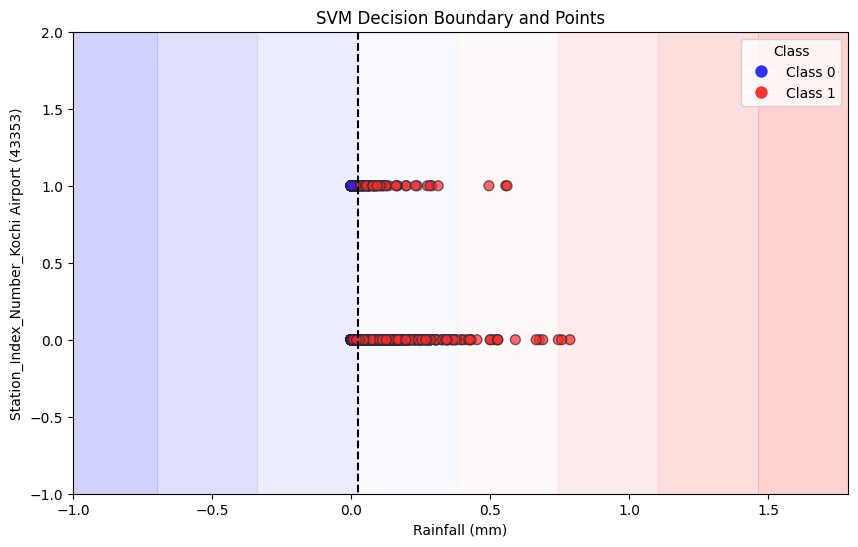

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'will_it_rain' is the target variable
X = df[['Rainfall (mm)', 'Station_Index_Number_Kochi Airport (43353)']]
y = df['will_it_rain']

# Drop rows with NaN values
X = X.dropna()
y = y[X.index]  # Ensure y is also aligned with X after dropping NaNs

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train the SVM classifier
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train, y_train)

# Make predictions
y_pred = clf_svc.predict(X_test)
print(y_pred)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the points
scatter = plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.bwr, s=50, edgecolors='k', marker='o', alpha=0.7)

# Plotting the decision boundary
xlim = (X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1)
ylim = (X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
Z = clf_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
plt.contour(xx, yy, Z, colors=['k'], levels=[0], linestyles=['--'])

plt.xlabel('Rainfall (mm)')
plt.ylabel('Station_Index_Number_Kochi Airport (43353)')
plt.title('SVM Decision Boundary and Points')

# Custom legend for scatter plot
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.bwr(0.1), markersize=10, label='Class 0'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.bwr(0.9), markersize=10, label='Class 1')
]
plt.legend(handles=handles, title='Class')

plt.show()
